<a href="https://colab.research.google.com/github/iSwami/IFG-IA/blob/main/happiness_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
happiness = pd.read_csv("happiness_2015.csv")

<ipython-input-25-c8c89fa357a4>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


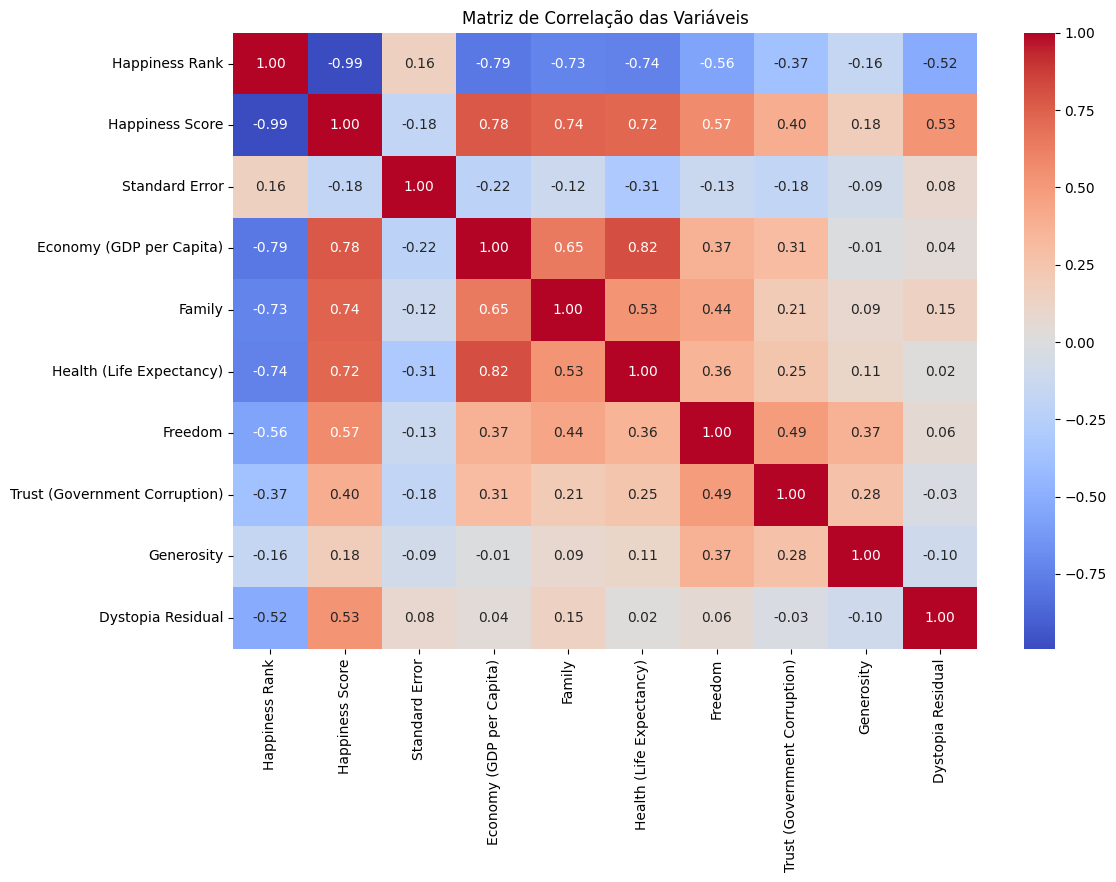

KeyError: ignored

In [25]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Carregar o conjunto de dados do Relatório Mundial da Felicidade de 2015
url = "happiness_2015.csv"  # Substitua pelo link do seu arquivo CSV
data = pd.read_csv(url)

# 1. Análise da correlação entre as variáveis
correlation_matrix = data.corr()

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# 2. Definir a variável resposta como "Health (Life Expectancy)" e propor um modelo de regressão linear
variavel_resposta = 'Health..Life.Expectancy'
covariaveis_independentes = ['Economy..GDP.per.Capita', 'Family', 'Freedom', 'Trust..Government.Corruption', 'Generosity']

# Renomear as colunas diretamente
data.columns = [col.replace('Health..Life.Expectancy', 'Health_Life_Expectancy') for col in data.columns]
data.columns = [col.replace('Economy..GDP.per.Capita', 'Economy_GDP_per_Capita') for col in data.columns]
data.columns = [col.replace('Trust..Government.Corruption', 'Trust_Government_Corruption') for col in data.columns]

# Criar conjunto de dados com variável resposta e covariáveis independentes
dados_modelo = data[[variavel_resposta] + covariaveis_independentes]

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados_modelo[covariaveis_independentes], dados_modelo[variavel_resposta], test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDesempenho do Modelo:")
print("Erro Quadrático Médio (MSE):", mse)
print("R²:", r2)

# 3. Verificar a relação de cada variável independente com a variável resposta
correlacao_com_resposta = data[covariaveis_independentes + [variavel_resposta]].corr()[variavel_resposta].sort_values(ascending=False)
print("\nCorrelação com a variável resposta:\n", correlacao_com_resposta)

# 4. Analisar criticamente a significância estatística das covariáveis para o modelo proposto
X = sm.add_constant(X_train)  # Adicionar uma constante ao modelo
modelo_statsmodels = sm.OLS(y_train, X).fit()

# Imprimir os resultados estatísticos do modelo
print("\nResultados Estatísticos do Modelo:")
print(modelo_statsmodels.summary())


<ipython-input-24-1ed1c19ca11f>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()



Valores de Correlação entre as Variáveis:
                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992105   
Happiness Score                     -0.992105         1.000000   
Standard Error                       0.158516        -0.177254   
Economy (GDP per Capita)            -0.785267         0.780966   
Family                              -0.733644         0.740605   
Health (Life Expectancy)            -0.735613         0.724200   
Freedom                             -0.556886         0.568211   
Trust (Government Corruption)       -0.372315         0.395199   
Generosity                          -0.160142         0.180319   
Dystopia Residual                   -0.521999         0.530474   

                               Standard Error  Economy (GDP per Capita)  \
Happiness Rank                       0.158516                 -0.785267   
Happiness Score                     -0.177254                  0.780966   
Stand

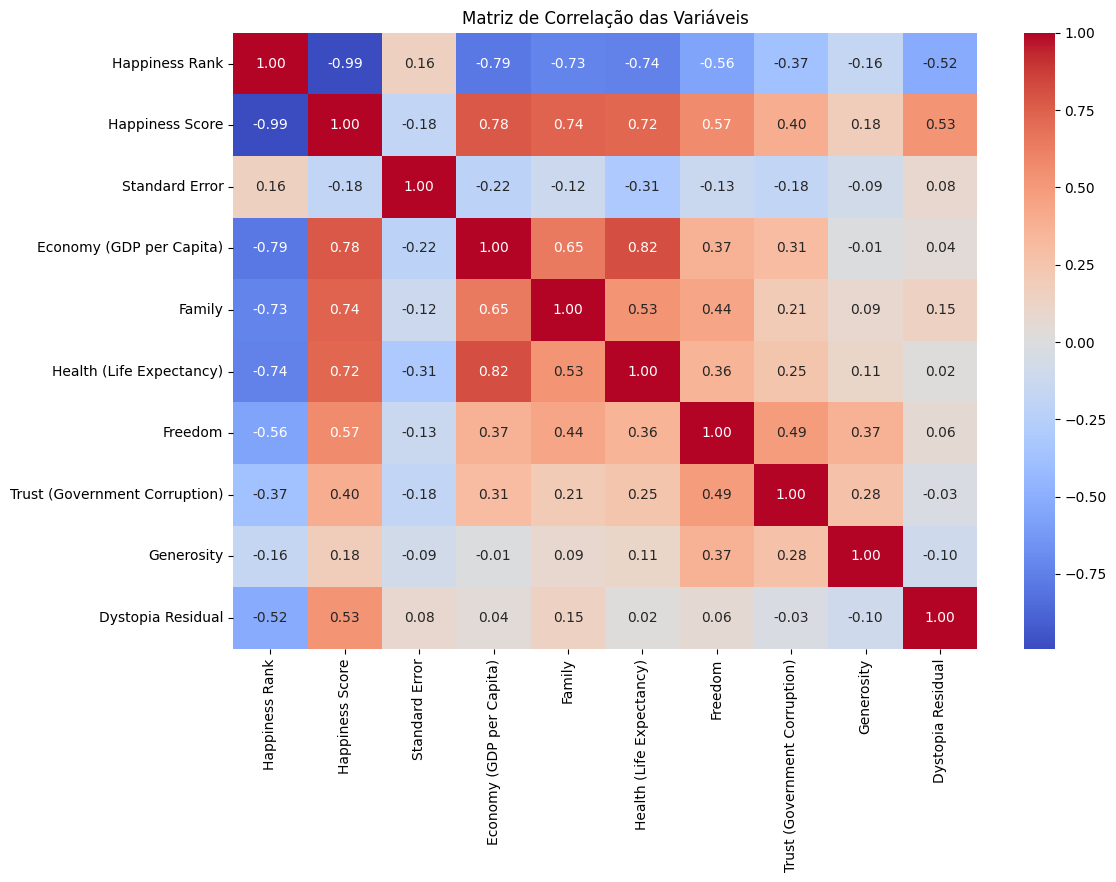

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados do Relatório Mundial da Felicidade de 2015
url = "happiness_2015.csv"  # Substitua pelo link do seu arquivo CSV
data = pd.read_csv(url)

# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Imprimir os valores de correlação
print("\nValores de Correlação entre as Variáveis:")
print(correlation_matrix)

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()
